In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 46.4 MB/s 
     |████████████████████████████████| 16.7 MB 36.5 MB/s 


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import requests
from mpl_toolkits.axes_grid1 import make_axes_locatable 

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
covid_dt = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

total_deaths_per_million = [ covid_dt.loc[ covid_dt['iso_code'] == iso, 'total_deaths_per_million' ].values for iso in world['iso_a3']]
world['total_deaths_per_million'] = [ np.nan if x.size < 1 else x[0] for x in total_deaths_per_million]

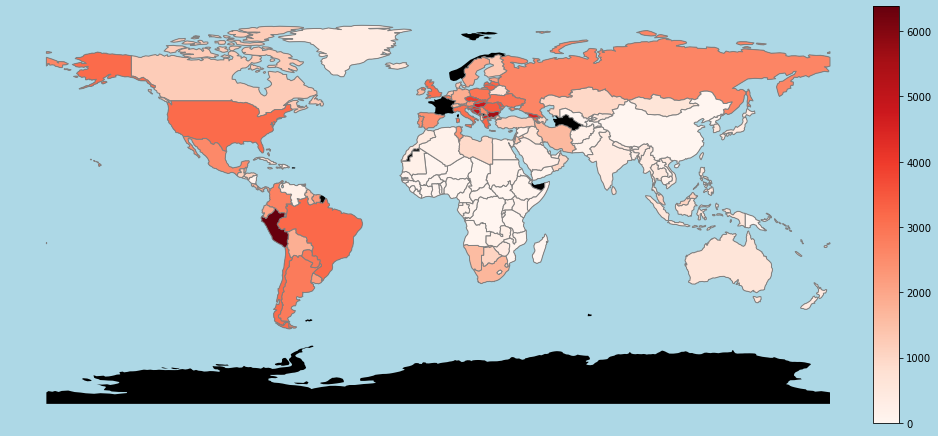

In [32]:
fig, ax = plt.subplots(1, figsize =(16, 8), facecolor ='lightblue') 
  
world.plot(ax = ax, color ='black') 
world.plot(ax = ax, column ='total_deaths_per_million', cmap ='Reds', edgecolors ='grey') 
div = make_axes_locatable(ax) 
cax = div.append_axes("right", size ="3 %", pad = 0.05) 
vmax = world.total_deaths_per_million.max() 
mappable = plt.cm.ScalarMappable(cmap ='Reds', norm = plt.Normalize(vmin = 0, vmax = vmax)) 
cbar = fig.colorbar(mappable, cax) 
  
ax.axis('off') 
plt.show() 
